In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
for i in df.columns:
    print(f'unique values in column "{i}" is \n {df[i].value_counts()} ')
    print('----------------------------------------------------------')

unique values in column "customerID" is 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 
----------------------------------------------------------
unique values in column "gender" is 
 Male      3555
Female    3488
Name: gender, dtype: int64 
----------------------------------------------------------
unique values in column "SeniorCitizen" is 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64 
----------------------------------------------------------
unique values in column "Partner" is 
 No     3641
Yes    3402
Name: Partner, dtype: int64 
----------------------------------------------------------
unique values in column "Dependents" is 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 
----------------------------------------------------------
unique values in column "tenure" is 
 1     613
72    3

In [7]:
for i in df.columns:
    print (f'{i} : {df[i].unique()} \n "{df[i].dtype}"')
    print('-----------------------------------------')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
 "object"
-----------------------------------------
gender : ['Female' 'Male'] 
 "object"
-----------------------------------------
SeniorCitizen : [0 1] 
 "int64"
-----------------------------------------
Partner : ['Yes' 'No'] 
 "object"
-----------------------------------------
Dependents : ['No' 'Yes'] 
 "object"
-----------------------------------------
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
 "int64"
-----------------------------------------
PhoneService : ['No' 'Yes'] 
 "object"
-----------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes'] 
 "object"
-----------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No'] 
 "object"
-----------------

In [8]:
df.shape

(7043, 21)

In [9]:
df.duplicated().sum()


0

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [11]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

In [14]:
df.drop(['customerID'],inplace=True, axis=1)

# EDA

In [15]:
plt.style.use('fivethirtyeight')

In [16]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype == 'object':
        object_col.append(i)
    else:
        num_col.append(i)

In [17]:
num_col
object_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

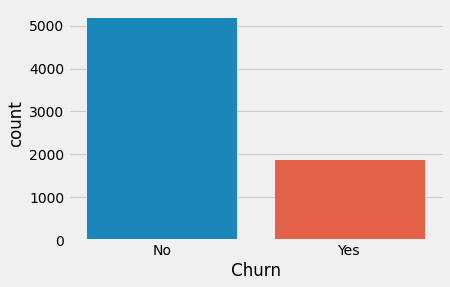

In [18]:
ax = sns.countplot(x=df.Churn)
plt.show()

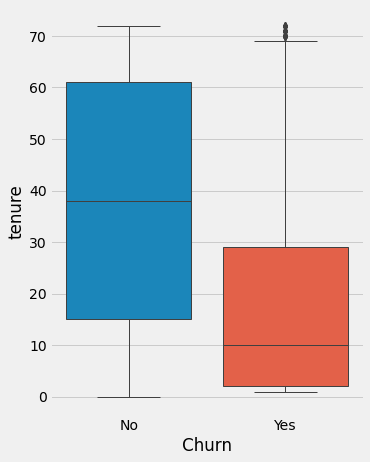

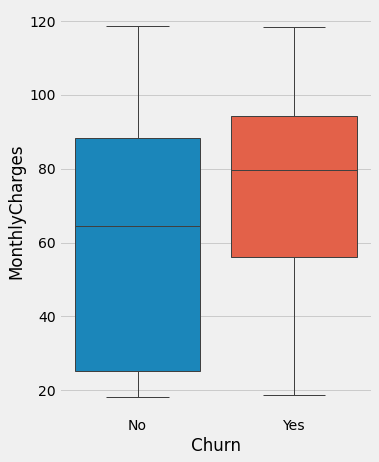

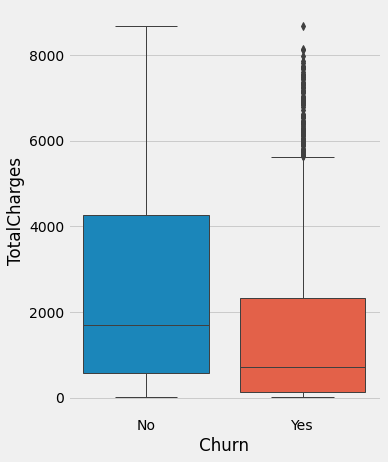

In [19]:
for i in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df.Churn, y=df[i], data=df , linewidth=1)
    plt.show()

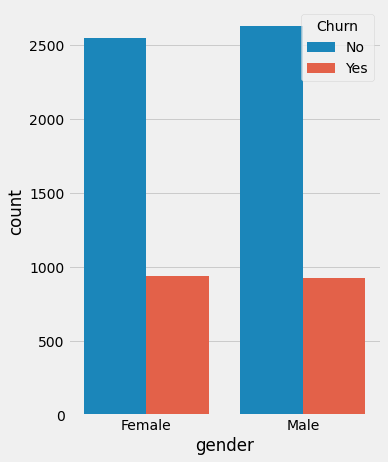

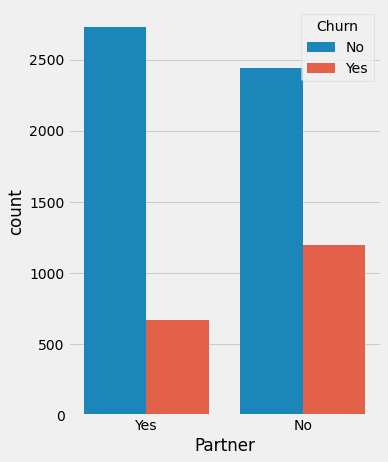

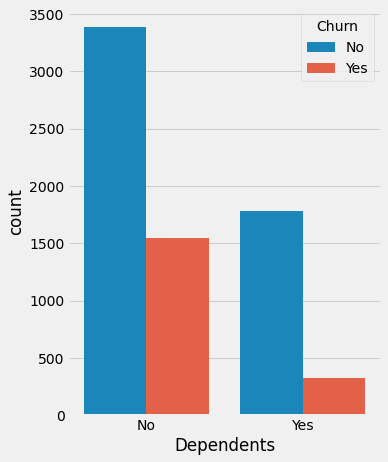

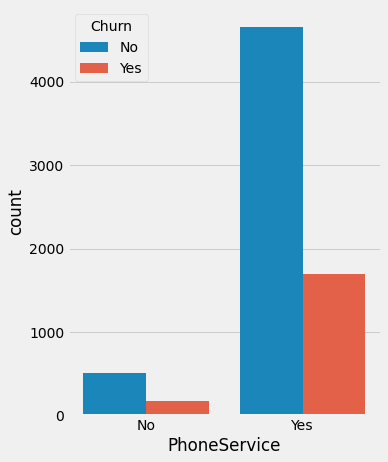

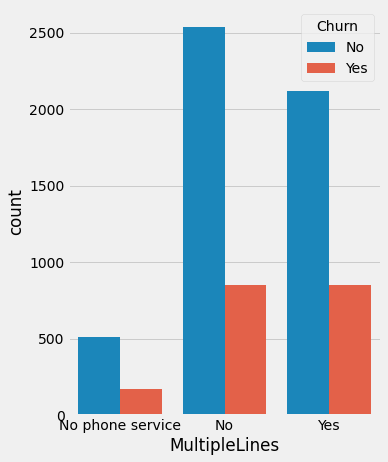

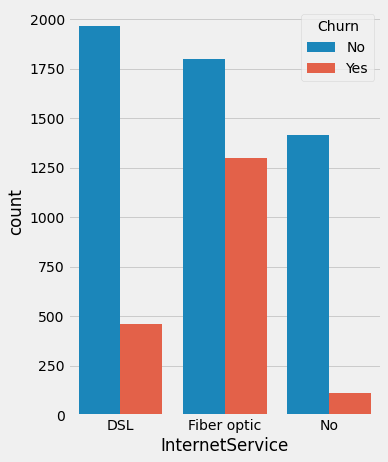

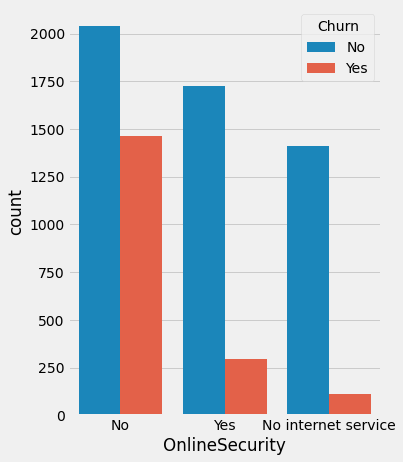

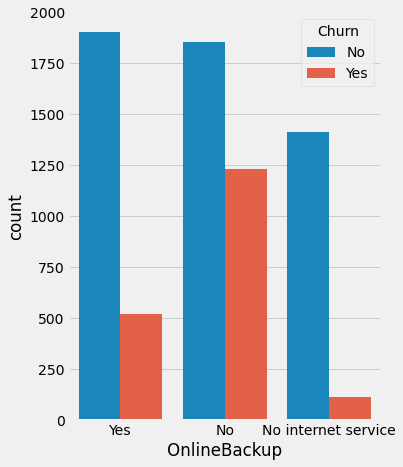

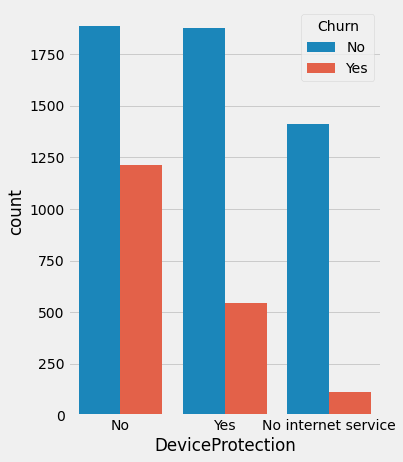

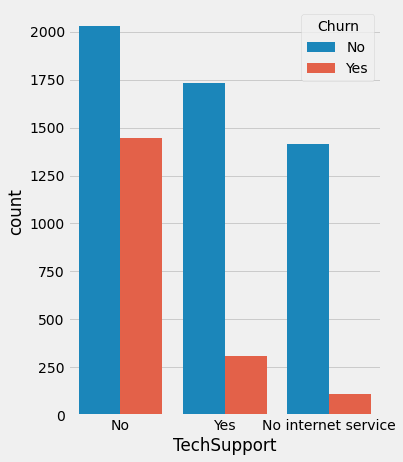

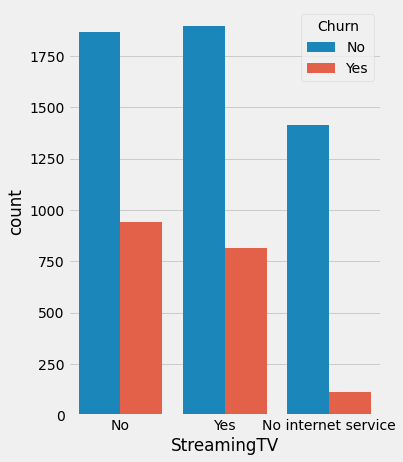

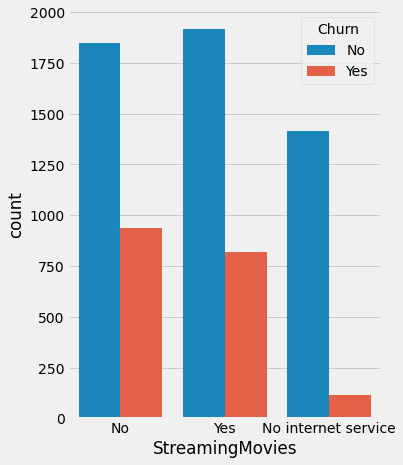

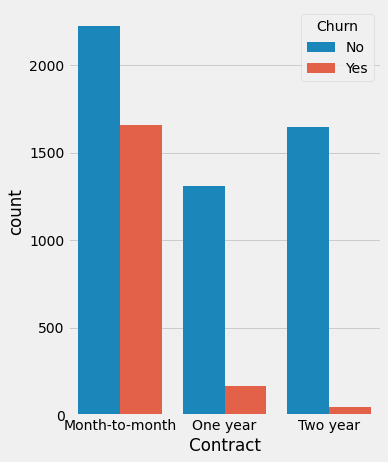

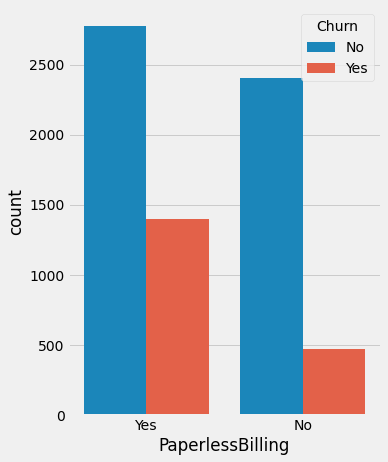

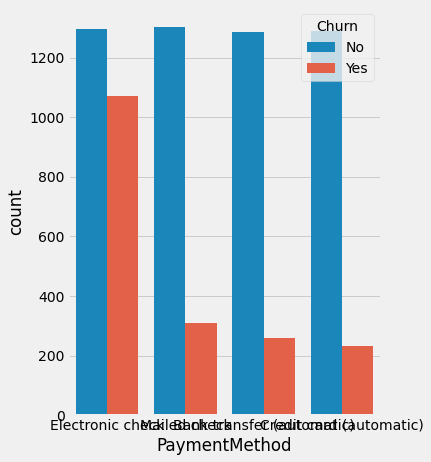

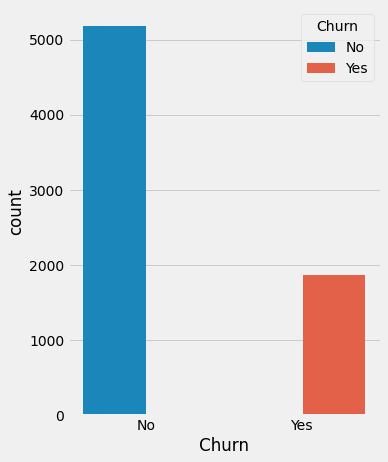

In [20]:
for i in object_col:
    plt.figure(figsize=(5,7))
    sns.countplot(x=df[i], hue=df.Churn, data=df , linewidth=0.3)
    plt.show()

array([<AxesSubplot:title={'center':'SeniorCitizen'}>,
       <AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>], dtype=object)

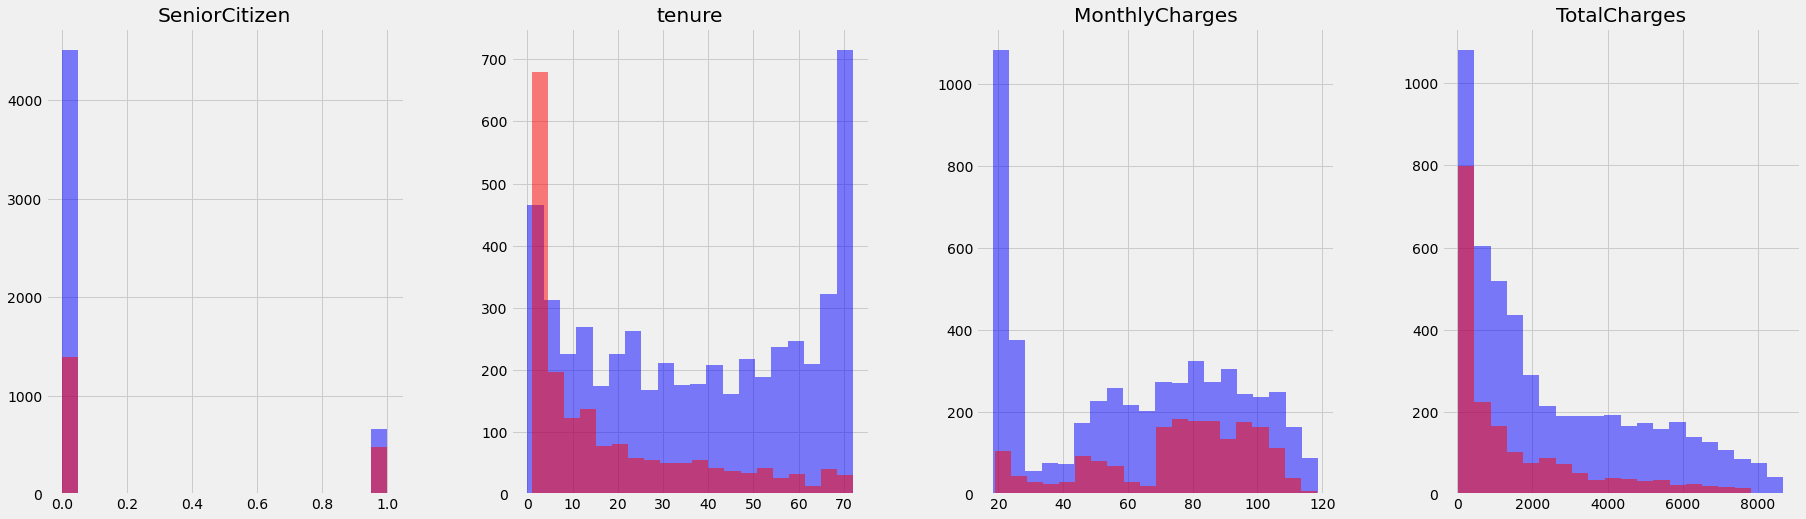

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(28, 8))
df[df.Churn == 'No'][num_col].hist(bins=20 , color= 'blue', alpha=0.5 , ax=ax)
df[df.Churn == 'Yes'][num_col].hist(bins=20 , color= 'red', alpha=0.5 , ax=ax)


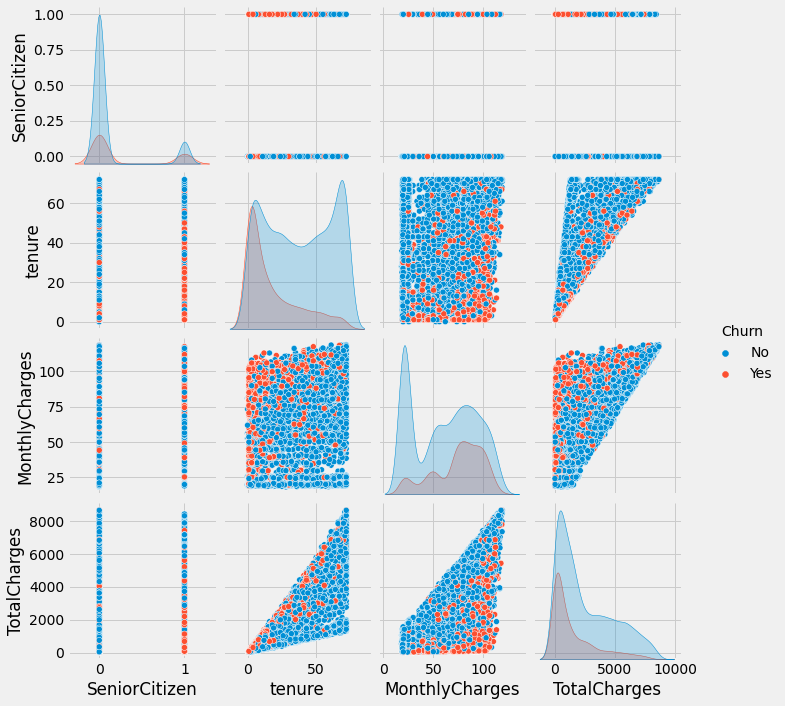

In [22]:
sns.pairplot(df, hue='Churn')

# Prepere data for modeling

In [23]:
object_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:
def change_yes_no(x):
    if x =='Yes' or x == 'Male':
        return 1
    elif x == 'No' or x == 'Female' :
        return 0
    else:
        return x
    
    
for i in object_col:
    if len(df[i].unique()) == 2:
        df[i] = df[i].map(change_yes_no)

In [25]:
df_dummies = pd.get_dummies(df,drop_first=True )
df_dummies

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

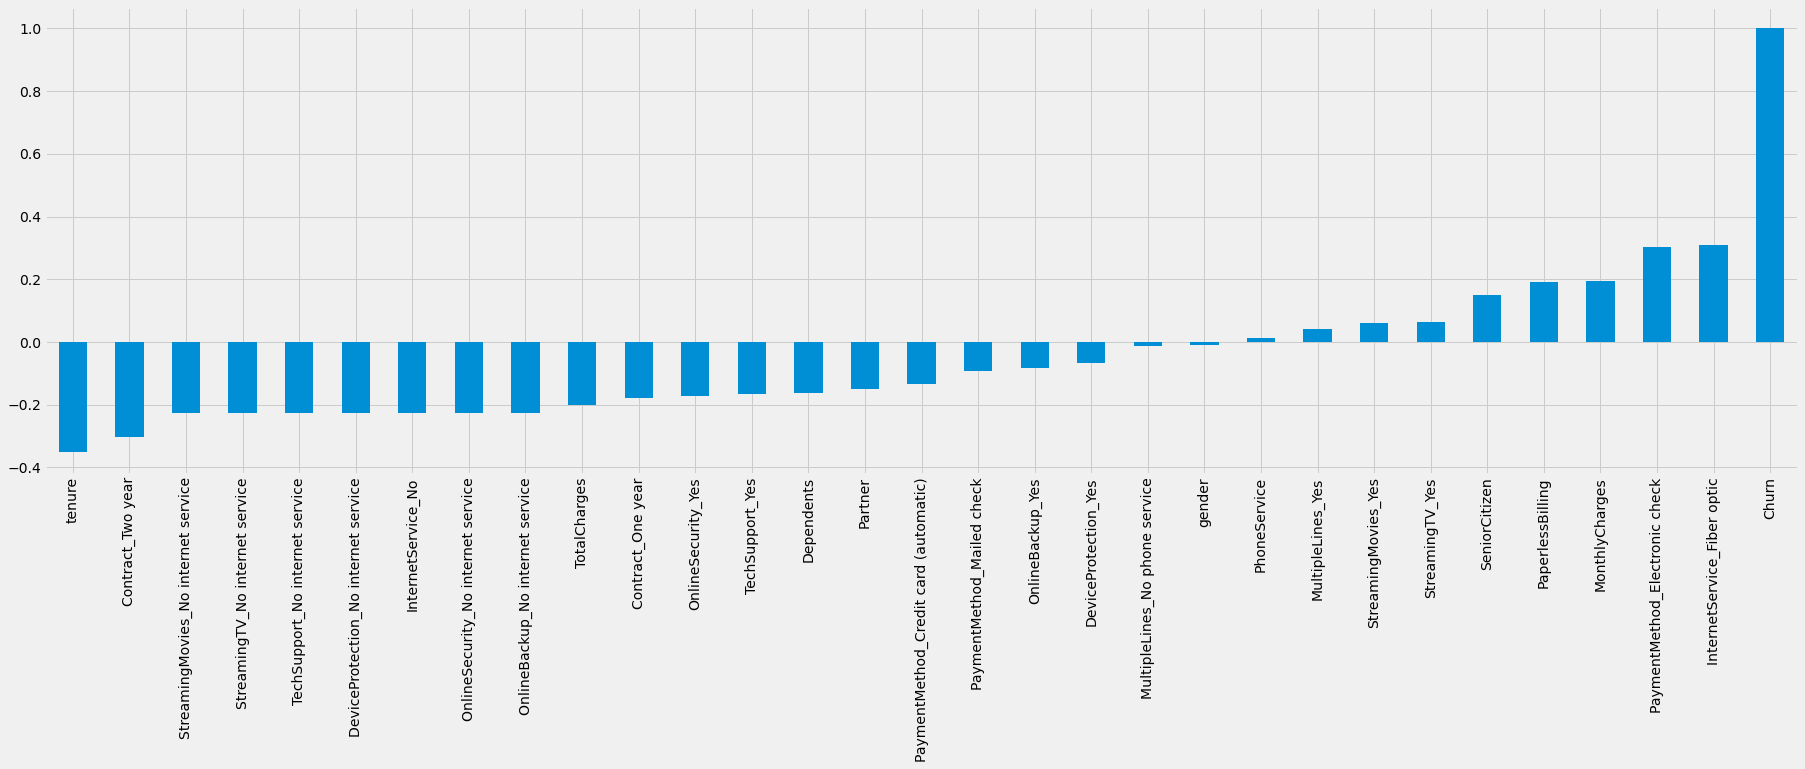

In [26]:
plt.figure(figsize=(28,8))
df_dummies.corr()['Churn'].sort_values().plot(kind='bar')

In [27]:
df_dummies.dropna(inplace=True)
df_dummies.shape

(7032, 31)

# Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=42) # using the random state for reproducibility
forest= RandomForestClassifier(random_state=42)
knn= KNeighborsClassifier()
svm= SVC(random_state=42)
xboost= XGBClassifier(random_state=42)

X = df_dummies.drop('Churn' , axis=1)
y = df_dummies['Churn']


models= [tree, forest, knn, svm, xboost]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=0)

for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 0.73
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1038
           1       0.49      0.50      0.49       369

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



The accuracy of model RandomForestClassifier is 0.79
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The accuracy of model KNeighborsClassifier is 0.76
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1038
           1       0.56      0.44      0.49       369

    accuracy         

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The accuracy of model SVC is 0.74
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1038
           1       0.00      0.00      0.00       369

    accuracy                           0.74      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.74      0.63      1407



[09:10:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of model XGBClassifier is 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.63      0.52      0.57       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407





## With StanderScaler

In [30]:
X_scaler = StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size = 0.2 , random_state=0)
for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 0.73
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1038
           1       0.49      0.50      0.49       369

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.73      0.73      1407



The accuracy of model RandomForestClassifier is 0.79
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



The accuracy of model KNeighborsClassifier is 0.76
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1038
           1       0.55      0.51      0.53       369

    accuracy         

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The accuracy of model XGBClassifier is 0.80
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.63      0.52      0.57       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407





## Data is unbalanced so I will use OverSampling

In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [32]:
X_resampled_scaler = StandardScaler().fit_transform(X_resampled) 

X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaler, y_resampled, test_size = 0.2 , random_state=0)
for model in models:
    model.fit(X_train, y_train) # fit the model
    y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred) # this gives us how often the algorithm predicted correctly
    clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print(clf_report)
    print("\n")

The accuracy of model DecisionTreeClassifier is 0.87
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1006
           1       0.83      0.94      0.88      1060

    accuracy                           0.87      2066
   macro avg       0.88      0.87      0.87      2066
weighted avg       0.88      0.87      0.87      2066



The accuracy of model RandomForestClassifier is 0.90
              precision    recall  f1-score   support

           0       0.94      0.85      0.90      1006
           1       0.87      0.95      0.91      1060

    accuracy                           0.90      2066
   macro avg       0.91      0.90      0.90      2066
weighted avg       0.91      0.90      0.90      2066



The accuracy of model KNeighborsClassifier is 0.78
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1006
           1       0.75      0.85      0.80      1060

    accuracy         

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The accuracy of model XGBClassifier is 0.86
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1006
           1       0.83      0.92      0.87      1060

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.86      0.86      2066



